In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Load BehavioralCloning Class from model.py

In [2]:
%run -n model.py

Using TensorFlow backend.


## Initialize model parameters

In [3]:
# Model parameters
csv_filename = 'data/driving_log_1.csv'
zero_frac = 0.25   # fraction of 0 steering records to be left after undersampling
m_frac = 0.6       # fraction of -1 steering records to be left after undersampling 
p_frac = 0.6       # fraction of 1 steering records to be left after undersampling
correction = 0.01   # steering correction for left and right camera images
top_crop, bottom_crop, left_crop, right_crop = 60, 25, 0, 0    # image crop parameters
layers = 2         # number of layers in input images
batch_size = 32    # initial batch size (is doubled by adding flipped images)
EPOCHS = 5         # number of training epocha
model_filename = 'model_i.h5'

## Create model instance

In [4]:
cloningModel = BehavioralCloning(csv_filename, model_filename, layers, zero_frac, m_frac, p_frac, correction, top_crop, bottom_crop, left_crop, right_crop, batch_size, EPOCHS)

## Data preprocessing

In [5]:
cloningModel.preview()

,center,left,right,steering
0,data/data/IMG/center_2016_12_01_13_30_48_287.jpg,data/data/IMG/left_2016_12_01_13_30_48_287.jpg,data/data/IMG/right_2016_12_01_13_30_48_287.jpg,0.0
1,data/data/IMG/center_2016_12_01_13_30_48_404.jpg,data/data/IMG/left_2016_12_01_13_30_48_404.jpg,data/data/IMG/right_2016_12_01_13_30_48_404.jpg,0.0
2,data/data/IMG/center_2016_12_01_13_31_12_937.jpg,data/data/IMG/left_2016_12_01_13_31_12_937.jpg,data/data/IMG/right_2016_12_01_13_31_12_937.jpg,0.0
3,data/data/IMG/center_2016_12_01_13_31_13_037.jpg,data/data/IMG/left_2016_12_01_13_31_13_037.jpg,data/data/IMG/right_2016_12_01_13_31_13_037.jpg,0.0
4,data/data/IMG/center_2016_12_01_13_31_13_177.jpg,data/data/IMG/left_2016_12_01_13_31_13_177.jpg,data/data/IMG/right_2016_12_01_13_31_13_177.jpg,0.0


In [6]:
cloningModel.describe('steering')

count    8036.000000
mean        0.004070
std         0.128840
min        -0.942695
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: steering, dtype: float64

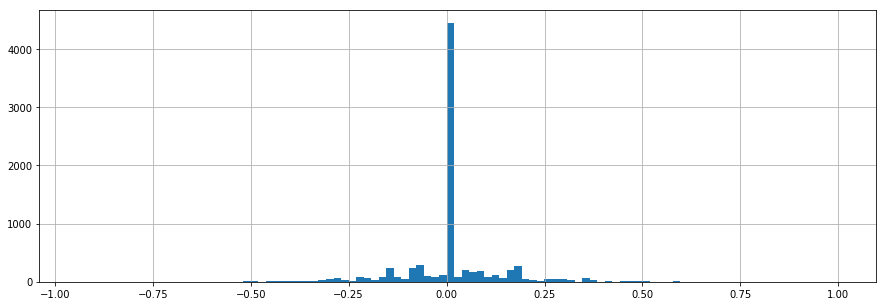

In [7]:
cloningModel.histogram('steering')

In [8]:
cloningModel.undersample()

In [9]:
cloningModel.describe('steering')

count    4764.000000
mean        0.006655
std         0.166664
min        -0.942695
25%        -0.069252
50%         0.000000
75%         0.090465
max         1.000000
Name: steering, dtype: float64

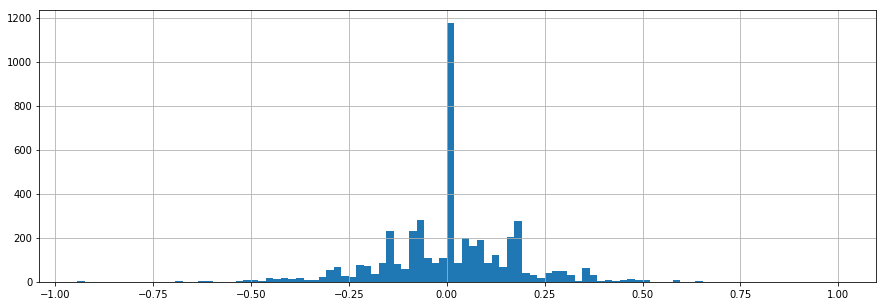

In [10]:
cloningModel.histogram('steering')

In [11]:
cloningModel.augment_center()

In [12]:
cloningModel.preview()

,image,steering
0,data/data/IMG/left_2016_12_01_13_41_54_082.jpg,0.100465
1,data/data/IMG/left_2016_12_01_13_45_01_251.jpg,-0.135206
2,data/data/IMG/left_2016_12_01_13_44_50_228.jpg,0.010000
3,data/data/IMG/right_2016_12_01_13_34_22_428.jpg,0.042191
4,data/data/IMG/center_2016_12_01_13_42_47_748.jpg,-0.078746


In [13]:
cloningModel.describe('steering')

count    14292.000000
mean         0.006655
std          0.166852
min         -0.952695
25%         -0.069757
50%          0.000000
75%          0.100034
max          1.010000
Name: steering, dtype: float64

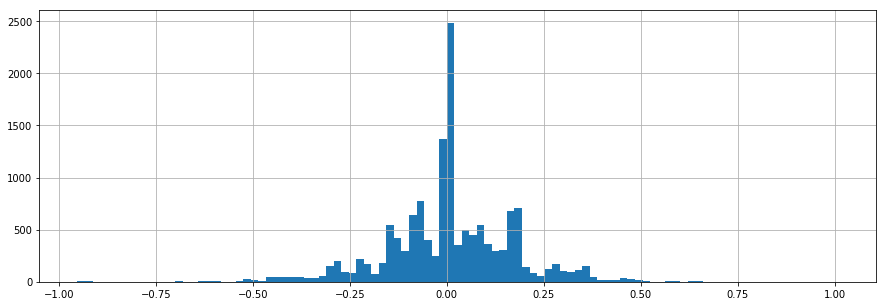

In [14]:
cloningModel.histogram('steering')

## Choice of image preprocessing

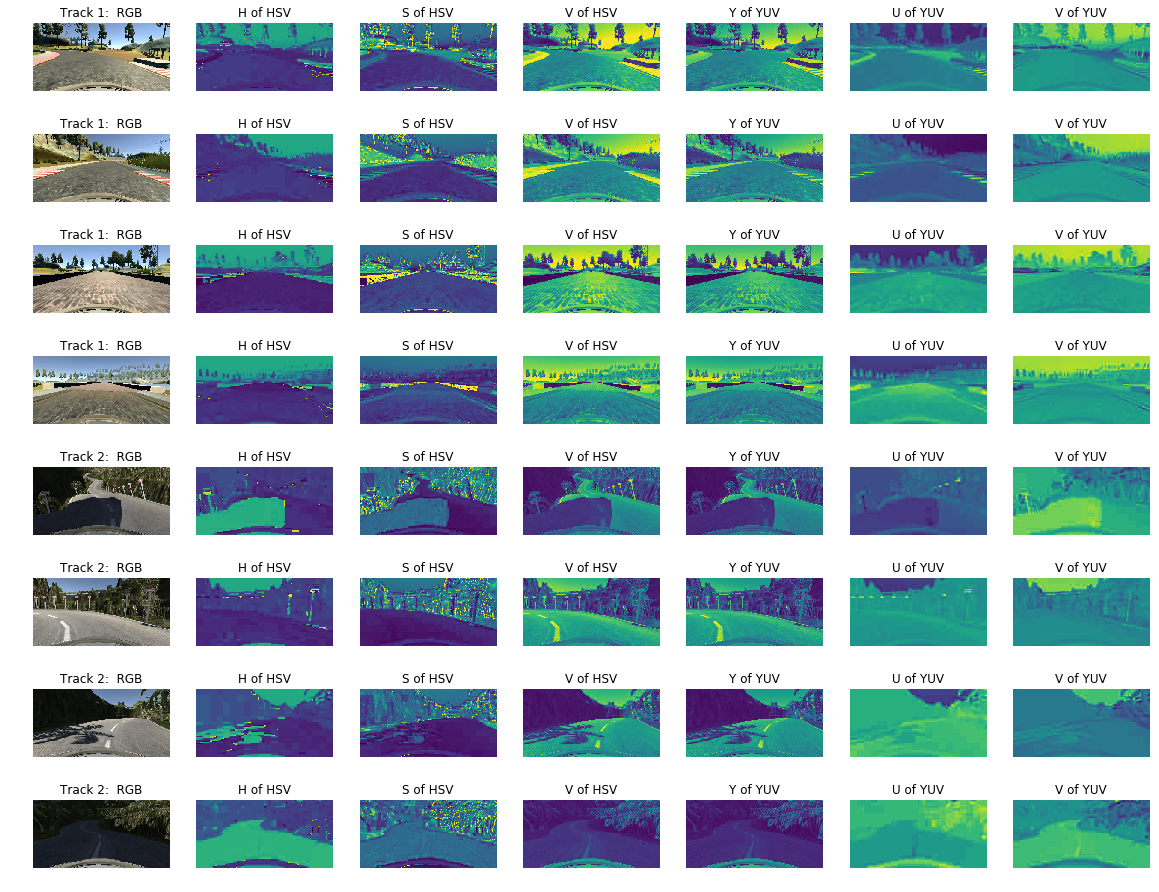

In [15]:
# Plotting typical images in HSV and YUV color spaces
import glob

images = glob.glob('examples/Track1/*.jpg') + glob.glob('examples/Track2/*.jpg')

fig, axs = plt.subplots(8, 7, figsize=(20, 2*8))
    
i = 0    
for i in range(8):
    filename = images[i]
    image = mpimg.imread(filename)
    axs[i,0].axis('off')
    axs[i,0].imshow(image)
    if i<4:
        axs[i,0].set_title('Track 1:  RGB') 
    else:    
        axs[i,0].set_title('Track 2:  RGB') 

    axs[i,1].axis('off')
    axs[i,1].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,0])
    axs[i,1].set_title('H of HSV') 
    
    axs[i,2].axis('off')
    axs[i,2].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,1])
    axs[i,2].set_title('S of HSV') 
    
    axs[i,3].axis('off')
    axs[i,3].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,2])
    axs[i,3].set_title('V of HSV') 
    
    axs[i,4].axis('off')
    axs[i,4].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,0])
    axs[i,4].set_title('Y of YUV') 

    axs[i,5].axis('off')
    axs[i,5].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,1])
    axs[i,5].set_title('U of YUV') 
   
    axs[i,6].axis('off')
    axs[i,6].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,2])
    axs[i,6].set_title('V of YUV') 


## Training and validating the model

In [16]:
cloningModel.split_train_validation()

(11433, 2859)

In [ ]:
cloningModel.train()

In [17]:
cloningModel.plot_loss()

AttributeError: 'BehavioralCloning' object has no attribute 'history_object'